In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

1) Завантажити дані, вивести назви колонок і розмір датасета

In [95]:
data = pd.read_csv('META.csv')
print("Column names:", data.columns)
print("Dataset size:", data.shape) 

Column names: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Dataset size: (2906, 7)


2) Опрацювати пропуски (по можливості заповнити їх або видалити)

In [96]:
data.fillna(0)
data.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2901,2023-11-29,339.690002,339.899994,330.779999,332.200012,332.200012,16024500
2902,2023-11-30,331.890015,333.500000,322.399994,327.149994,327.149994,23146400
2903,2023-12-01,325.480011,326.859985,320.760010,324.820007,324.820007,15264700
2904,2023-12-04,317.290009,320.859985,313.660004,320.019989,320.019989,19037100


3) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції
ознак між собою і з цільовою змінною (розміткою); побудувати гістограми
розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато
обмежитися декількома)

Heatmap кореляцій

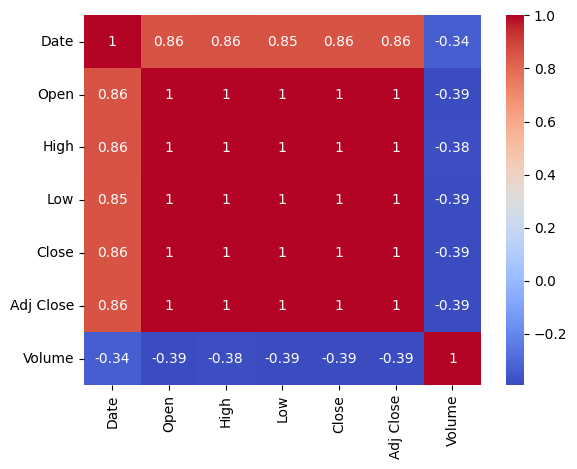

In [97]:
data['Date'] = pd.to_datetime(data['Date'])
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()



Гістограми розподілу ознак

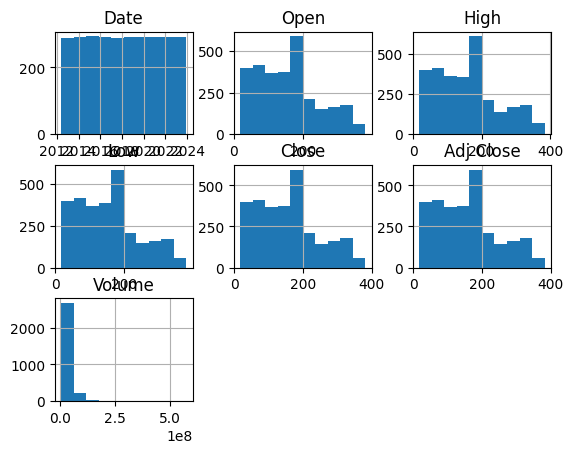

In [98]:
data.hist()
plt.show()

Boxplot-и ознак відносно цільової змінної

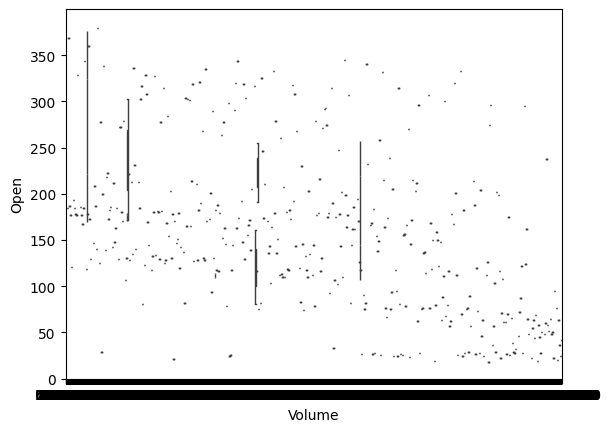

In [99]:
sns.boxplot(x='Volume', y='Open', data=data)
plt.show()

4) Нормалізація даних

In [100]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
datetime_columns = ['Date']

numeric_data = data[numeric_columns]
scaler_numeric = StandardScaler()
normalized_numeric_data = scaler_numeric.fit_transform(numeric_data)

normalized_data_numeric = pd.DataFrame(normalized_numeric_data, columns=numeric_columns)

normalized_data = pd.concat([data[datetime_columns], normalized_data_numeric], axis=1)

print(normalized_data_numeric)

          Open      High       Low     Close  Adj Close     Volume
0    -1.271886 -1.245720 -1.310961 -1.314413  -1.314413  20.548938
1    -1.333203 -1.337189 -1.367190 -1.361045  -1.361045   5.204740
2    -1.376747 -1.370859 -1.390357 -1.394687  -1.394687   2.691200
3    -1.390522 -1.382813 -1.385633 -1.383584  -1.383584   1.624307
4    -1.372971 -1.375026 -1.381023 -1.372148  -1.372148   0.740001
...        ...       ...       ...       ...        ...        ...
2901  2.034347  1.988570  1.981604  1.949503   1.949503  -0.554986
2902  1.947703  1.918379  1.887363  1.893433   1.893433  -0.285414
2903  1.876500  1.845555  1.868920  1.867563   1.867563  -0.583745
2904  1.785524  1.779751  1.789074  1.814269   1.814269  -0.440956
2905  1.804297  1.790938  1.808530  1.795062   1.795062  -0.520837

[2906 rows x 6 columns]


5) Навчання класифікаторів

In [101]:

threshold = data['Volume'].mean()
data['Target'] = (data['Volume'] > threshold).astype(int)

X = normalized_data_numeric.drop(columns=['Volume'])
y = data['Target']



Розбиття на тренувальний та тестовий набори

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kNN

In [103]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

Decision Tree

In [104]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

SVM

In [105]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

Random Forest

In [106]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

AdaBoost

In [107]:
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier()

Оцінка моделей

In [108]:
models = [knn_classifier, tree_classifier, svm_classifier, rf_classifier, adaboost_classifier]

for model in models:
    y_pred = model.predict(X_test)
    print(f"Classification Report for {type(model).__name__}:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix for {type(model).__name__}:\n{confusion_matrix(y_test, y_pred)}")

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       391
           1       0.84      0.60      0.70       191

    accuracy                           0.83       582
   macro avg       0.83      0.77      0.79       582
weighted avg       0.83      0.83      0.82       582

Confusion Matrix for KNeighborsClassifier:
[[369  22]
 [ 76 115]]
Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       391
           1       0.71      0.65      0.68       191

    accuracy                           0.80       582
   macro avg       0.77      0.76      0.77       582
weighted avg       0.79      0.80      0.80       582

Confusion Matrix for DecisionTreeClassifier:
[[339  52]
 [ 66 125]]
Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.82     